In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib.rnn import *
import matplotlib.pyplot as plt
import os


S:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
num_neurons = 100
num_inputs = 1
num_outputs = 1
symbol = 'goog' # amzn
epochs = 500
seq_len = 20 
learning_rate = 0.001
f = open(symbol + '.txt', 'r').read()
data = f.split('\n')[:-1] # get rid of the last '' so float(n) works
data.reverse()
d = [float(n) for n in data]

In [3]:
result = []
for i in range(len(d) - seq_len - 1):
    result.append(d[i: i + seq_len + 1])

result = np.array(result)
row = int(round(0.9 * result.shape[0]))
train = result[:row, :] 
test = result[row:, :]
np.random.shuffle(train) 
X_train = train[:, :-1] # all rows with all columns except the last one 
X_test = test[:, :-1] # each row contains seq_len + 1 columns

y_train = train[:, 1:] 
y_test = test[:, 1:]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], num_inputs))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], num_inputs)) 
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], num_outputs))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], num_outputs)) 
X = tf.placeholder(tf.float32, [None, seq_len, num_inputs])
y = tf.placeholder(tf.float32, [None, seq_len, num_outputs])

cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=num_neurons, activation=tf.nn.relu), output_size=num_outputs)
outputs, _ = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

preds = tf.reshape(outputs, [1, seq_len], name="preds")
loss = tf.reduce_mean(tf.square(outputs - y)) 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [4]:
with tf.Session() as sess:
    init.run()

    count = 0
    for _ in range(epochs):
        n=0
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        count += 1
        if count % 10 == 0:
            saver.save(sess, "/tmp/" + symbol + "_model.ckpt") 
            loss_val = loss.eval(feed_dict={X: X_train, y: y_train})
            print(count, "loss:", loss_val)
            
            
            
            
            correct = 0
    y_pred = sess.run(outputs, feed_dict={X: X_test}) 
    targets = []
    predictions = []

10 loss: 146723.22
20 loss: 56131.727
30 loss: 35662.98
40 loss: 25910.12
50 loss: 21491.3
60 loss: 18663.691
70 loss: 16688.363
80 loss: 15116.402
90 loss: 13809.408
100 loss: 12666.455
110 loss: 11631.824
120 loss: 10675.438
130 loss: 9781.65
140 loss: 8912.579
150 loss: 8058.7925
160 loss: 7211.588
170 loss: 6376.1045
180 loss: 5563.397
190 loss: 4789.5586
200 loss: 4061.466
210 loss: 3388.815
220 loss: 2779.7234
230 loss: 2241.149
240 loss: 1775.7817
250 loss: 1383.1398
260 loss: 1059.8767
270 loss: 800.83813
280 loss: 599.7414
290 loss: 447.71536
300 loss: 338.154
310 loss: 258.33905
320 loss: 202.67401
330 loss: 165.60687
340 loss: 141.0613
350 loss: 127.87814
360 loss: 116.01791
370 loss: 110.195366
380 loss: 106.34106
390 loss: 104.25209
400 loss: 102.928215
410 loss: 102.50282
420 loss: 102.93544
430 loss: 102.34267
440 loss: 101.24304
450 loss: 101.22155
460 loss: 100.956985
470 loss: 100.85464
480 loss: 100.73632
490 loss: 100.621
500 loss: 100.51099


In [5]:
    for i in range(y_pred.shape[0]):
        input = X_test[i]
        target = y_test[i]
        prediction = y_pred[i]

        targets.append(target[-1][0])
        predictions.append(prediction[-1][0])

        if target[-1][0] >= input[-1][0] and prediction[-1][0] >= input[-1][0]:
            correct += 1
        elif target[-1][0] < input[-1][0] and prediction[-1][0] < input[-1][0]:
            correct += 1
            total = len(X_test)

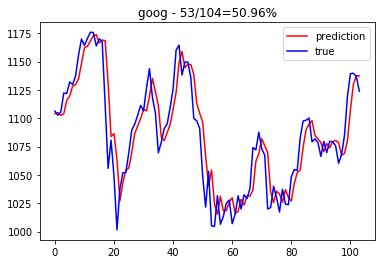

In [6]:
    xs = [i for i, _ in enumerate(y_test)]
    plt.plot(xs, predictions, 'r-', label='prediction') 
    plt.plot(xs, targets, 'b-', label='true')
    plt.legend(loc=0)
    plt.title("%s - %d/%d=%.2f%%" %(symbol, correct, total, 
               100*float(correct)/total))
    plt.show()